In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\bigdata\documents\python scripts\udemy-python-4-finance\pyfin\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [5]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


In [6]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-06-30,119.570000,3100.290039
2020-07-01,119.980003,3115.860107
2020-07-02,120.879997,3130.010010
2020-07-06,121.629997,3179.719971
2020-07-07,122.669998,3172.300049


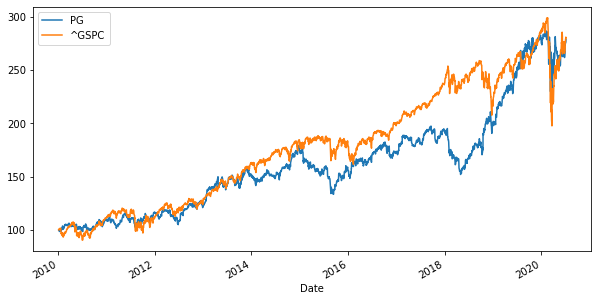

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250

PG       0.096820
^GSPC    0.097352
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029594,0.018066
^GSPC,0.018066,0.030727


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.599091
^GSPC,0.599091,1.000000


In [12]:
num_assets = len(assets)

In [13]:
num_assets

2

In [14]:
arr = np.random.random(2)
arr

array([0.84786944, 0.37074146])

In [15]:
arr[0] + arr[1]

1.2186109038116923

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.89079427, 0.10920573])

In [17]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.09687850224615863

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.027364538551841833

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16542230367106436

***

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

for rets, vols in zip(pfolio_returns, pfolio_volatilities):
    print(f'Returns: {rets}\nVolatilities: {vols}')
    print('\n')

Returns: 0.09710761095996447
Volatilities: 0.15555464463319887


Returns: 0.0973468851954908
Volatilities: 0.17457597224677154


Returns: 0.09716084230377892
Volatilities: 0.15731198583504924


Returns: 0.09699846555519613
Volatilities: 0.15679930292132924


Returns: 0.09694967705266835
Volatilities: 0.15943327858766002


Returns: 0.09711407608132169
Volatilities: 0.1556860919842968


Returns: 0.09694743159295562
Volatilities: 0.1595841765991836


Returns: 0.0969976236990801
Volatilities: 0.15683411970098998


Returns: 0.09726588705804848
Volatilities: 0.16508889075597555


Returns: 0.0971441402224708
Volatilities: 0.15659615619283795


Returns: 0.09707330465468872
Volatilities: 0.155241134093706


Returns: 0.0969480070636059
Volatilities: 0.15954526012711576


Returns: 0.09690444076514723
Volatilities: 0.1629574500050287


Returns: 0.09731260912087562
Volatilities: 0.17022377436826683


Returns: 0.09683750195595084
Volatilities: 0.16993742958203356


Returns: 0.09723976678306287
Volat

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_returns, pfolio_volatilities

In [23]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,0.096904,0.162979
1,0.097042,0.155516
2,0.096946,0.159688
3,0.097037,0.155620
4,0.097280,0.166492


In [25]:
portfolios.tail()

,Return,Volatility
995,0.097093,0.155342
996,0.097203,0.159786
997,0.097049,0.155409
998,0.097060,0.155294
999,0.097030,0.155770


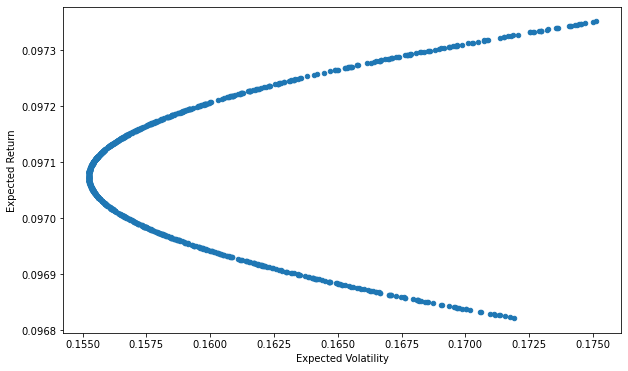

In [27]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.show()